skipping bad lines -->

In [ ]:
import pandas as pd
df = pd.read_csv('/content/songs_normalize.csv', on_bad_lines='skip')
print(df.columns)
print(df.head())
print(df.info())

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre;'],
      dtype='object')
                                              artist                    song  \
0                                     Britney Spears  Oops!...I Did It Again   
1  blink-182,All The Small Things,167066,False,19...                     NaN   
2  Faith Hill,Breathe,250546,False,1999,66,0.529,...                     NaN   
3  Bon Jovi,It's My Life,224493,False,2000,78,0.5...                     NaN   
4                                             *NSYNC             Bye Bye Bye   

   duration_ms explicit    year  popularity  danceability  energy  key  \
0     211160.0    False  2000.0        77.0         0.751   0.834  1.0   
1          NaN      NaN     NaN         NaN           NaN     NaN  NaN   
2          NaN      NaN     NaN  

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

reenaming genre wthout ;

In [ ]:
df = df.rename(columns={'genre;': 'genre'})

cleaning genre values

In [ ]:
df['genre'] = df['genre'].str.strip().str.replace(';', '')

double checking numeric columns if theyre really numeric:

In [ ]:
numeric_cols = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'tempo', 'valence']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df = df.dropna(subset=['genre'] + numeric_cols)
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

fit nearest neighbiurs mdl

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)
distances, indices = nn.kneighbors(X[0].reshape(1, -1))
print("Top 5 similar songs to:", df.iloc[0]['song'])
print(df.iloc[indices[0]][['artist', 'song', 'genre']])

Top 5 similar songs to: Oops!...I Did It Again
              artist                            song    genre
0     Britney Spears          Oops!...I Did It Again      pop
283           *NSYNC                      Girlfriend      pop
373            JAY-Z                  Excuse Me Miss  hip hop
98    Britney Spears                           Lucky      pop
1882      Bruno Mars  Finesse - Remix; feat. Cardi B      pop


1-xpand ml models


-Random forest for classification or regression vibes
-Logistic regression iif im classifying genres
-Linear Regression if im predicting popularity or danceability

In [ ]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train model with x_train and y_train --> then x_test y_test

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.578
Classification Report:
                  precision    recall  f1-score   support

Dance/Electronic       0.00      0.00      0.00        12
             R&B       0.00      0.00      0.00         5
         country       0.00      0.00      0.00         2
         hip hop       0.71      0.12      0.20        42
           latin       0.00      0.00      0.00         5
           metal       0.00      0.00      0.00         3
             pop       0.57      0.99      0.73       117
            rock       0.50      0.06      0.10        18
           set()       0.00      0.00      0.00         7

        accuracy                           0.58       211
       macro avg       0.20      0.13      0.11       211
    weighted avg       0.50      0.58      0.45       211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2-random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.3f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.588
Random Forest Classification Report:
                  precision    recall  f1-score   support

Dance/Electronic       0.00      0.00      0.00        12
             R&B       0.00      0.00      0.00         5
         country       1.00      0.50      0.67         2
         hip hop       0.70      0.38      0.49        42
           latin       0.00      0.00      0.00         5
           metal       0.00      0.00      0.00         3
             pop       0.60      0.91      0.72       117
            rock       0.14      0.06      0.08        18
           set()       0.00      0.00      0.00         7

        accuracy                           0.59       211
       macro avg       0.27      0.20      0.22       211
    weighted avg       0.49      0.59      0.51       211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3-trying knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"kNN Accuracy: {acc_knn:.3f}")
print("kNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

kNN Accuracy: 0.550
kNN Classification Report:
                  precision    recall  f1-score   support

Dance/Electronic       0.12      0.08      0.10        12
             R&B       0.00      0.00      0.00         5
         country       0.00      0.00      0.00         2
         hip hop       0.50      0.19      0.28        42
           latin       0.00      0.00      0.00         5
           metal       0.00      0.00      0.00         3
             pop       0.59      0.89      0.71       117
            rock       0.50      0.17      0.25        18
           set()       0.00      0.00      0.00         7

        accuracy                           0.55       211
       macro avg       0.19      0.15      0.15       211
    weighted avg       0.48      0.55      0.47       211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Winner..? RANDOM FOREST!.

- best overall accuracy
-better macro average
BUT BAD for minority genres...

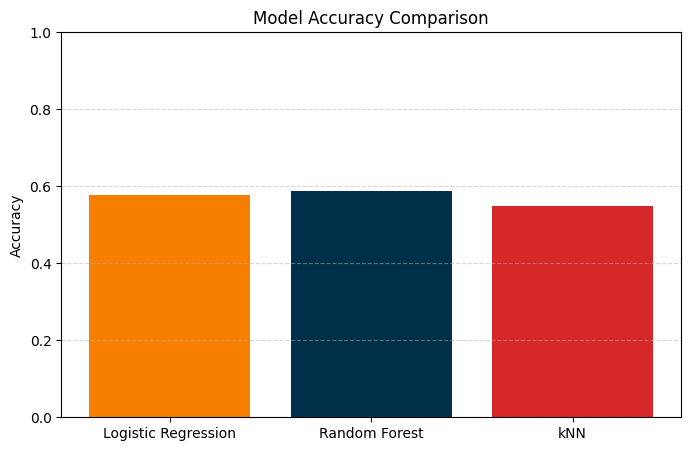

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'kNN']
accuracies = [0.578, 0.588, 0.550]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['#f77f00', '#003049', '#d62828'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
